#### Файл клиента xmlrpc_client_p3.ipynb на Python 3

In [1]:
import xmlrpc.client
import pickle
from PIL import Image # Работа с изображением
from pylab import * # Отображение

In [2]:
proxy_server = xmlrpc.client.ServerProxy("http://localhost:8028")
stats_server = xmlrpc.client.ServerProxy("http://localhost:8018")

In [3]:
# print(proxy_server.system.listMethods())

print ('Ping:', proxy_server.ping())
print ('Server datetime:', proxy_server.now())
print ('View, type, value:', proxy_server.type(2))
print ('View, type, value:', proxy_server.type(2.))
print ('View, type, value:', proxy_server.type('My string'))
print ('View, type, value:', proxy_server.type("My string"))
print ('View, type, value:', proxy_server.type([1,2,3]))
print ('View, type, value:', proxy_server.type(["one", "two", "three"]))
print ('View, type, value:', proxy_server.type((1,2,"3")))
print ('Sum 2 + 3 :', proxy_server.sum(2, 3))
print ('Pow 2^3: ', proxy_server.pow(2, 3))

Ping: True
Server datetime: 20231107T19:09:01
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


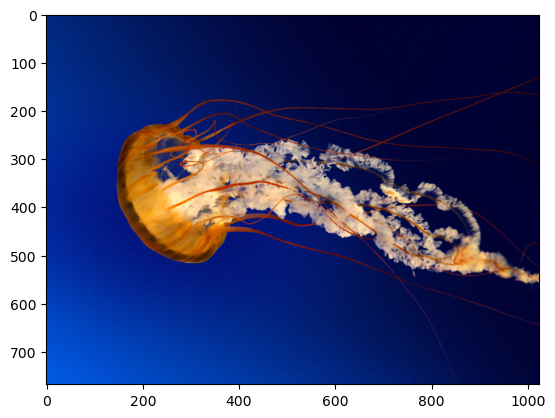

In [4]:
img = Image.open('Jellyfish.jpg')
img_black = Image.open('11.bmp')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

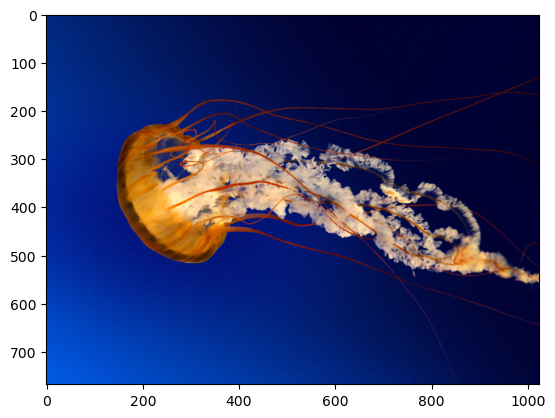

In [5]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = proxy_server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

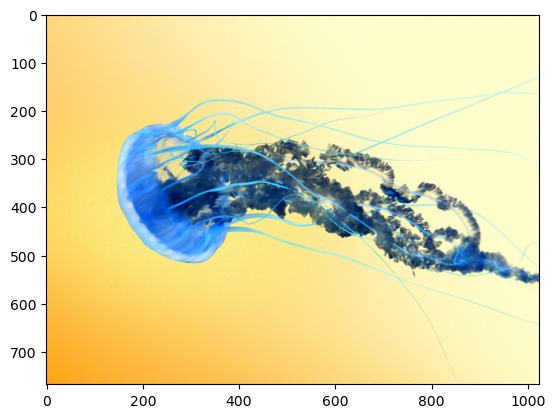

In [6]:
# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = proxy_server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

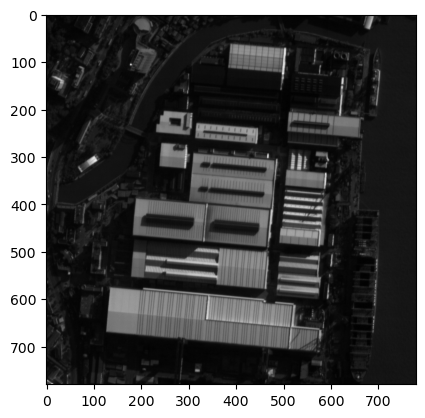

In [7]:
# исходное монохромное
img_arr_black = array(img_black)
imshow(img_arr_black, cmap='gray')

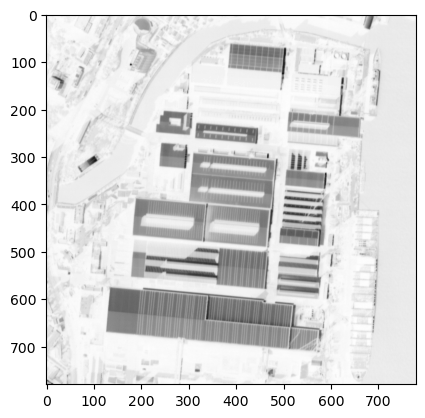

In [8]:
img_arr_inv_black = inv_color(img_arr_black)

# Изображение с инверсией цвета
imshow(img_arr_inv_black, cmap='gray')

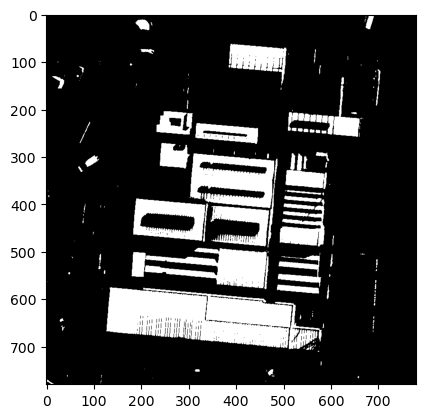

In [9]:
# Бинаризация изображения по порогу через сервер
def binarization(image_array_in, threshold):
    pimg = pickle.dumps(image_array_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = proxy_server.threshold_binarization(img_bin, threshold)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

threshold = 70
image_array_binarized_monochromatic = binarization(img_arr_black, threshold)
imshow(image_array_binarized_monochromatic, cmap='gray')

In [10]:
image_array_binarized_colored = binarization(img_arr, threshold)
imshow(image_array_binarized_colored)

Fault: <Fault 1: "<class 'TypeError'>:'>=' not supported between instances of 'int' and 'NoneType'">

In [ ]:
# Отражение изображения повертикали через сервер
def vertical_reflection(image_array_in):
    pimg = pickle.dumps(image_array_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = proxy_server.vertical_reflect(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_monochromatic_reflected = vertical_reflection(img_arr_black)
imshow(img_monochromatic_reflected, cmap='gray')

In [ ]:
# Отражение изображения повертикали через сервер
img_reflected = vertical_reflection(img_arr)
imshow(img_reflected)

In [5]:
for l in stats_server.get_log_records(["pow", "sum", "now", "color_inversion", "threshold_binarization"],
    "2023-11-07 18:07", "3000", 1015, 1700):
    print(l)

['ping', 1016.139030456543, '2023-11-07 19:08:59']
['type', 1015.6760215759277, '2023-11-07 19:09:21']
['send_back_binary', 1408.5218906402588, '2023-11-07 19:09:35']
['color_inversion', 1630.218505859375, '2023-11-07 19:09:40']
['color_inversion', 1047.6014614105225, '2023-11-07 19:09:45']
['threshold_binarization', 1252.6392936706543, '2023-11-07 19:09:49']
